# Import libraries and define path

In [1]:
import os
import glob
import shutil
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import label, regionprops, find_contours

# Support functions

In [2]:
# ------------------------------------------------------------------------
# Image to mask functions
# ------------------------------------------------------------------------

def mask_to_border(mask):
    """ Mask to border """
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border


def mask_to_bbox(mask):
    """ Mask to bounding boxes """
    bboxes = []

    mask = mask_to_border(mask)
    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

In [3]:
def eda_image_size(img_path_lst):
    """
    EDA image size
    """

    df = pd.DataFrame(columns=['image', 'height of image', 'width of image'])

    for img_path in tqdm(img_path_lst):
        img = cv2.imread(img_path)
        h, w = img.shape[:2]
        df.loc[len(df)] = {
                            'image': img_path,
                            'height of image': int(h),
                            'width of image': int(w),
                        }

    print('Average height:', df['height of image'].mean())
    print('Average width:', df['width of image'].mean())
    sns.jointplot(
                    df,
                    x="height of image",
                    y="width of image",
                    # kind="kde"
                )

In [4]:
def eda_image_bboxes(mask_path_lst):
    """
    EDA bboxes from mask
    """

    df = pd.DataFrame(columns=['image', 'height of region', 'width of region'])

    for mask_path in tqdm(mask_path_lst):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        h_mask, w_mask = mask.shape[:2]
        bboxes = mask_to_bbox(mask)
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            h = (y2-y1)/h_mask*100
            w = (x2-x1)/w_mask*100
            if h*w/100 <1:
                continue
            df.loc[len(df)] = {
                                'image': os.path.basename(mask_path),
                                'height of region': h,
                                'width of region': w,
                            }

    df['area'] = df['height of region'] * df['width of region']/100
    print('Average height:', df['height of region'].mean())
    print('Average width:', df['width of region'].mean())

    df_sorted = df.sort_values(by='area')
    print(df_sorted.head(5)[['image', 'area']])
    print(df_sorted.tail(5)[['image', 'area']])

    sns.jointplot(
                    df,
                    x="height of region",
                    y="width of region",
                    # kind="kde"
                )

# Datasets EDA

## Kvasir

In [5]:
Kvasir_folder = 'data/Kvasir_Splited'
img_path_lst = glob.glob(os.path.join(Kvasir_folder, '*', 'images', '*.png'))
mask_path_lst = glob.glob(os.path.join(Kvasir_folder, '*', 'masks', '*.png'))

100%|██████████| 1000/1000 [00:08<00:00, 124.09it/s]


Average height: 545.228
Average width: 625.292


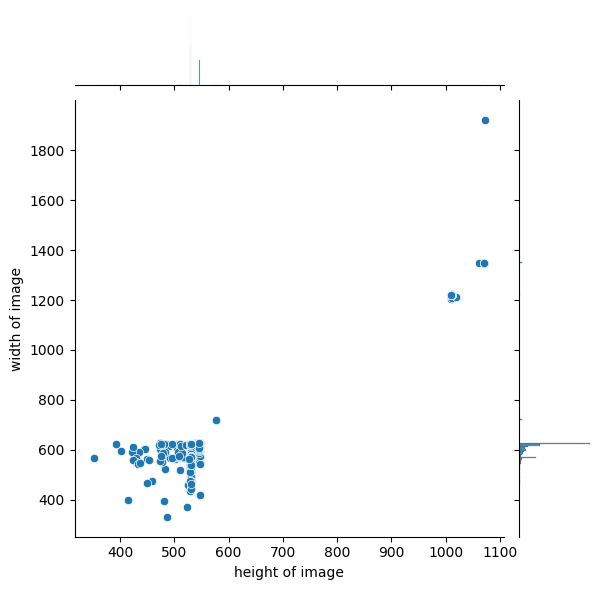

In [6]:
eda_image_size(img_path_lst)

100%|██████████| 1000/1000 [00:08<00:00, 116.93it/s]


Average height: 46.64846018179955
Average width: 38.39888888397495
                              image      area
327   cju6z9a9kwsl007552s49rx6i.png  1.041362
1011  cju3uhb79gcgr0871orbrbi3x.png  1.085133
1024  cju2hfqnmhisa0993gpleeldd.png  1.090147
788   cju7dmlgf2ebw0871ieqas5fh.png  1.100015
867   cju3ykamdj9u208503pygyuc8.png  1.101120
                             image       area
416  cju88l66no10s0850rsda7ej1.png  90.192644
438  cju8doa16u5gh0818w1ywda3q.png  90.737240
688  cju2nnqrqzp580855z8mhzgd6.png  91.312741
674  cju8dqkrqu83i0818ev74qpxq.png  92.946005
826  cju2oi8sq0i2y0801mektzvw8.png  99.925816


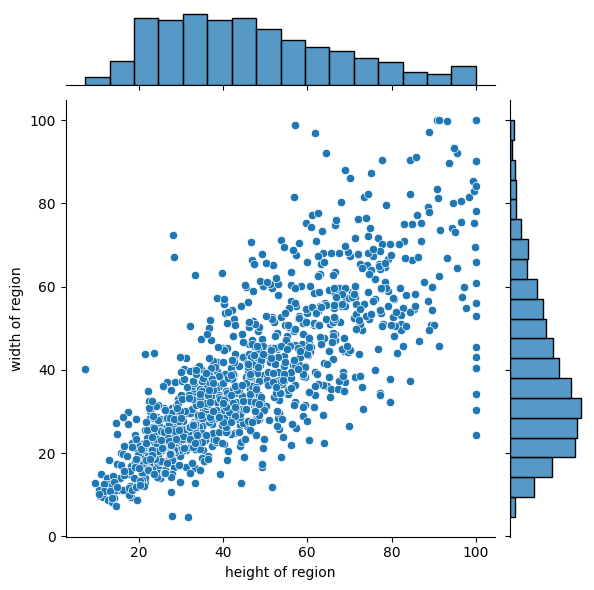

In [7]:
eda_image_bboxes(mask_path_lst)

## CVC-ClinicDB

In [8]:
CVCClinicDB_folder = 'data/CVC-ClinicDB_Splited'
img_path_lst = glob.glob(os.path.join(CVCClinicDB_folder, '*', 'images', '*.png'))
mask_path_lst = glob.glob(os.path.join(CVCClinicDB_folder, '*', 'masks', '*.png'))

100%|██████████| 612/612 [00:01<00:00, 380.48it/s]


Average height: 288.0
Average width: 384.0


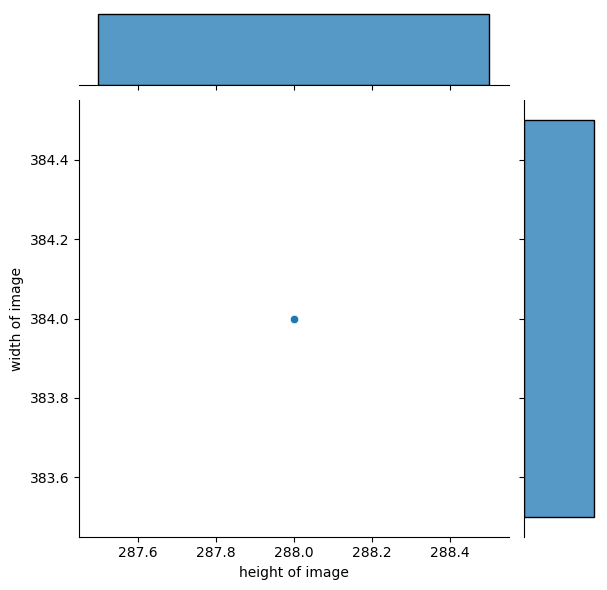

In [9]:
eda_image_size(img_path_lst)

100%|██████████| 612/612 [00:01<00:00, 316.20it/s]


Average height: 38.371082056700125
Average width: 30.707293317485473
       image      area
67   570.png  1.030816
626   53.png  1.044379
615  560.png  1.139323
301  567.png  1.168258
284  375.png  1.193576
       image       area
393  210.png  54.623300
159  478.png  55.799696
367  490.png  63.657407
490   25.png  71.195023
361   22.png  72.256583


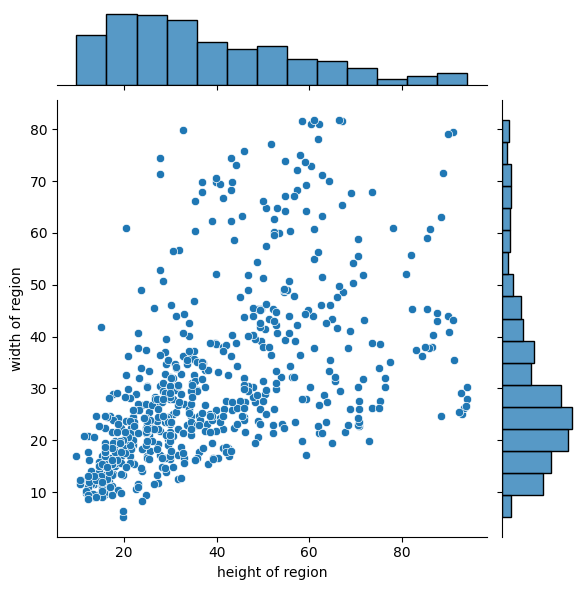

In [10]:
eda_image_bboxes(mask_path_lst)

## CVC-ColonDB

In [11]:
CVCColonDB_folder = 'data/TestDataset/CVC-ColonDB'
img_path_lst = glob.glob(os.path.join(CVCColonDB_folder, 'images', '*.png'))
mask_path_lst = glob.glob(os.path.join(CVCColonDB_folder, 'masks', '*.png'))

100%|██████████| 380/380 [00:02<00:00, 148.45it/s]


Average height: 500.0
Average width: 574.0


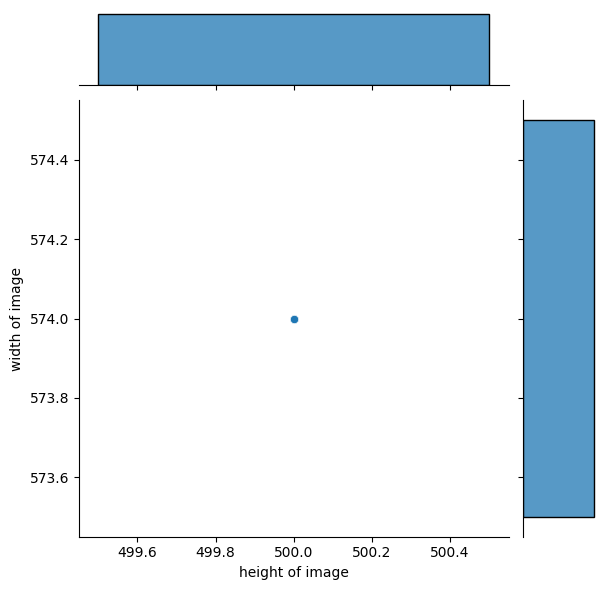

In [12]:
eda_image_size(img_path_lst)

100%|██████████| 380/380 [00:02<00:00, 160.54it/s]


Average height: 31.876323119777158
Average width: 28.09439694078596
       image      area
273  345.png  1.030662
254   51.png  1.036934
22   352.png  1.053659
58   373.png  1.053659
304   83.png  1.070383
       image       area
315  305.png  64.536585
126  304.png  67.595819
34   303.png  69.266551
29   302.png  73.379791
128  310.png  81.764111


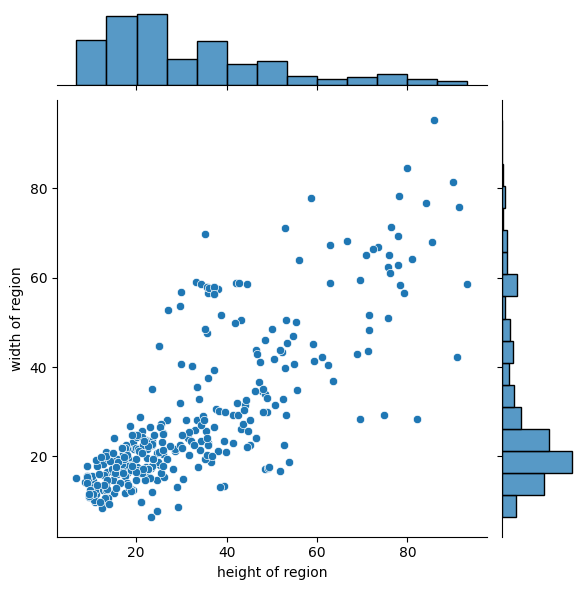

In [13]:
eda_image_bboxes(mask_path_lst)

## CVC-300

In [14]:
CVC300_folder = 'data/TestDataset/CVC-300'
img_path_lst = glob.glob(os.path.join(CVC300_folder, 'images', '*.png'))
mask_path_lst = glob.glob(os.path.join(CVC300_folder, 'masks', '*.png'))

100%|██████████| 60/60 [00:00<00:00, 195.88it/s]


Average height: 500.0
Average width: 574.0


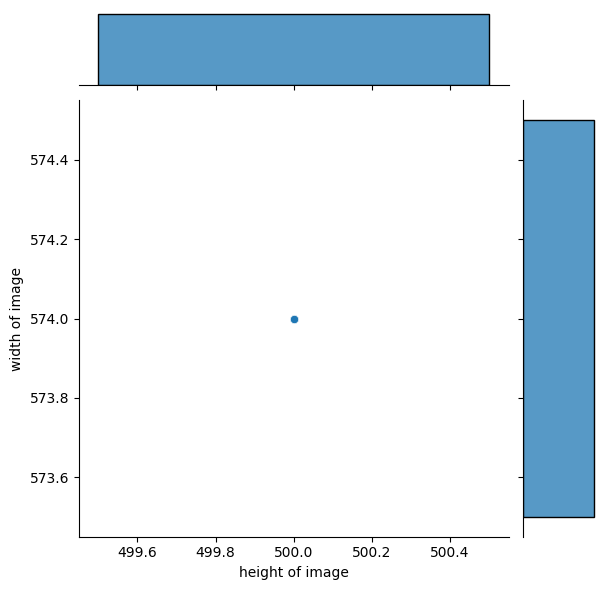

In [15]:
eda_image_size(img_path_lst)

100%|██████████| 60/60 [00:00<00:00, 124.89it/s]


Average height: 19.732203389830506
Average width: 20.31831335262505
      image      area
7   205.png  1.228571
47  185.png  1.354704
43  206.png  1.410453
8   201.png  1.580488
41  207.png  1.650871
      image       area
22  197.png   6.717073
24  170.png   9.436934
5   150.png  10.124739
35  149.png  13.454007
31  171.png  21.825784


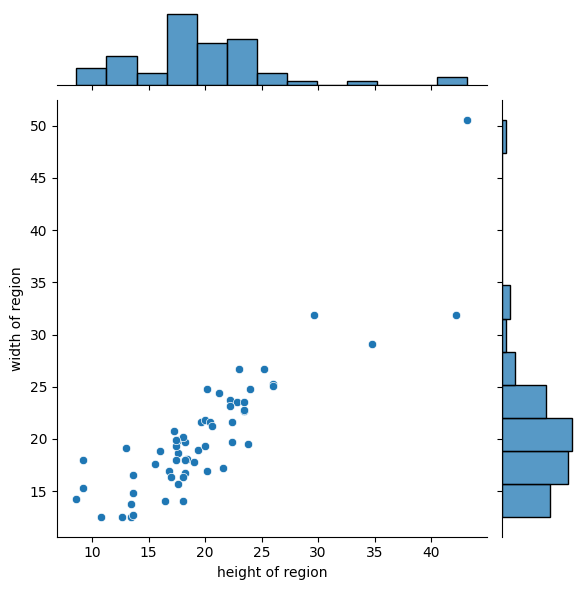

In [16]:
eda_image_bboxes(mask_path_lst)

## ETIS

In [17]:
CVCClinicDB_folder = 'data/TestDataset/ETIS-LaribPolypDB'
img_path_lst = glob.glob(os.path.join(CVCClinicDB_folder, 'images', '*.png'))
mask_path_lst = glob.glob(os.path.join(CVCClinicDB_folder, 'masks', '*.png'))

100%|██████████| 196/196 [00:05<00:00, 37.39it/s]


Average height: 966.0
Average width: 1225.0


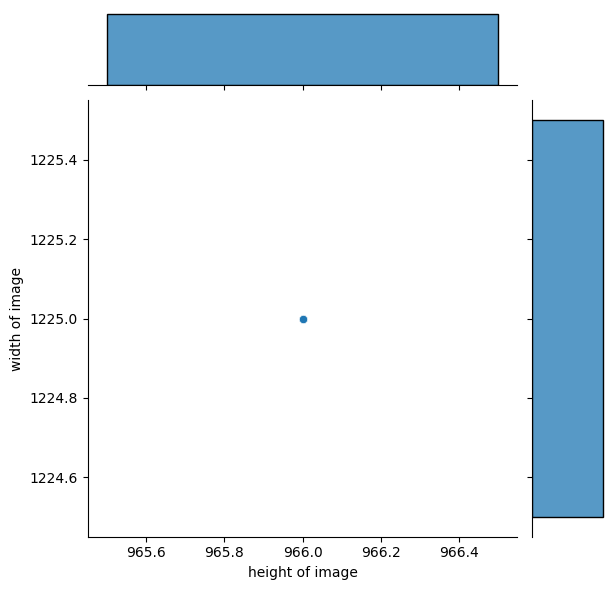

In [18]:
eda_image_size(img_path_lst)

100%|██████████| 196/196 [00:04<00:00, 40.48it/s]


Average height: 27.517574269343736
Average width: 21.383009017560514
       image      area
133   75.png  1.029535
6     58.png  1.040605
40    57.png  1.056323
171   53.png  1.073393
76   169.png  1.087590
      image       area
32  179.png  31.439219
72  116.png  32.811594
73  181.png  38.182786
7   182.png  38.893987
41  177.png  40.854185


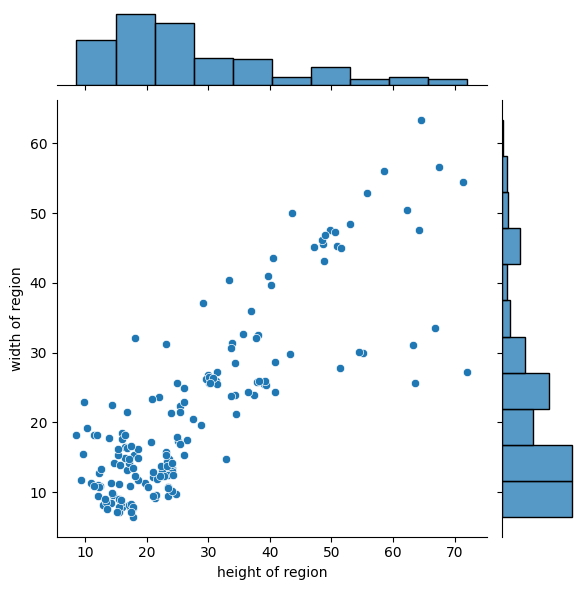

In [19]:
eda_image_bboxes(mask_path_lst)